In [3]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [3]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [4]:
print(len(classNameslabels))

2


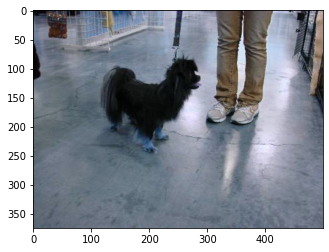

In [5]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("datasetCats&Dogs/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [6]:
print(imageData.shape)

(375, 499, 3)


In [7]:
image_shape = (128, 128)

In [12]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["datasetCats&Dogs/training_set/", "datasetCats&Dogs/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [15]:
#datasetLoaderFromDirectory()

In [14]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : datasetCats&Dogs/training_set/


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:05<00:00, 668.26it/s]


Counting : datasetCats&Dogs/test_set/


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 726.67it/s]


In [16]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [18]:
train_labels[2]

1.0

In [19]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [20]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


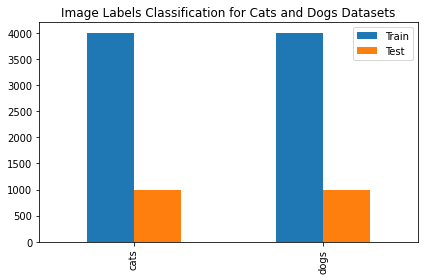

In [21]:
pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

In [22]:
imageFeature = train_images[0]

len(np.unique(imageFeature))

256

In [23]:
train_images = train_images/255.0
test_image = test_image/255.0

In [24]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

256

In [25]:
train_images.shape 

(8000, 128, 128, 3)

In [40]:
def ImageVisualization(classNames, imagePath, imagelabel):
  
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " ,  And Class is : "+classNames[int(imagelabel[index])] + " ,  And Actual is: " + classNames[int(imagelabel[index])])
    plt.show()

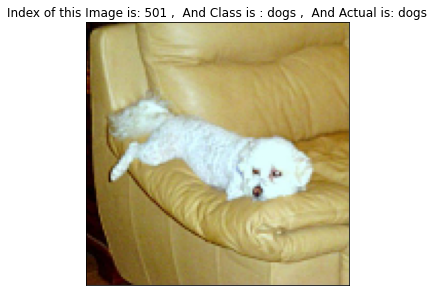

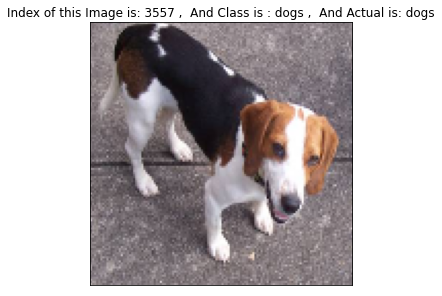

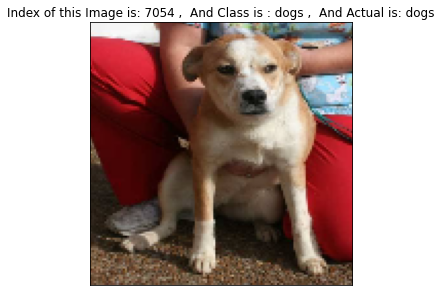

In [41]:
for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [42]:
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

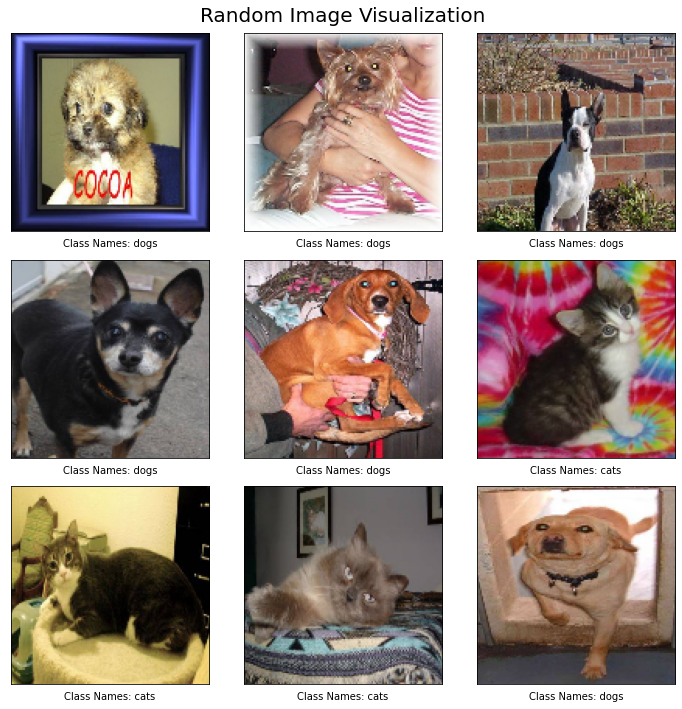

In [43]:
ImageVisualization2(classNames, train_images, train_labels)

In [44]:
train_images.shape

(8000, 128, 128, 3)

Custom Neural Neywork Model

In [2]:
model = Sequential()
    
#Input Layer
model.add(Conv2D(filters = 32, kernel_size = (11,11), padding = "valid", activation = "relu", input_shape = (128,128, 3)))
model.add(Conv2D(filters = 32, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))



 #1st Layer
model.add(Conv2D(filters = 64,kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))


#2nd Layer
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))

# 3rd Layer
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))




# 4th Layer
model.add(Conv2D(filters = 256, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))


# 5th layer
model.add(Conv2D(filters = 256, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11,11), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides = (4,4)))

model.add(Flatten())


#Output Layer
model.add(Dense(128, activation = "relu")) 
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

NameError: name 'Sequential' is not defined